# Portfolio Data Download

This notebook downloads daily stock price data from Yahoo Finance for tickers listed in stocks_list.csv

Data is saved to the `/data` folder

In [ ]:
import pandas as pd
import numpy as np
import edhec_risk_ph as erk
import os
%load_ext autoreload
%autoreload 2

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

## Step 1: Load Stock Tickers from CSV

In [2]:
# Read the stocks list
stocks_df = pd.read_csv('stocks_list.csv')
tickers = stocks_df['ticker'].dropna().unique().tolist()

print(f"Found {len(tickers)} unique tickers:")
print(tickers)

Found 30 unique tickers:
['SCHD', 'VOO', 'VTI', 'SPY', 'IVV', 'GOOGL', 'AAPL', 'MSFT', 'AMZN', 'VIG', 'NFLX', 'NVDA', 'IBM', 'BMY', 'FTNT', 'PSTG', 'ASML', 'AVNT', 'PWR', 'TTD', 'COST', 'AES', 'SGMO', 'NVO', 'VIGI', 'VYM', 'SAM', 'SCHY', 'VMBS', 'VEU']


## Step 2: Download Daily Price Data (5 Years)

Using the `get_from_yahoo()` function to download Close prices and Volume

In [3]:
# Download data for past 5 years
prices_data = erk.get_from_yahoo(tickers, period='5y')

print(f"Data shape: {prices_data.shape}")
print(f"Date range: {prices_data.index[0]} to {prices_data.index[-1]}")
prices_data.head()

[*********************100%***********************]  30 of 30 completed

Data shape: (1255, 60)
Date range: 2021-02-05 00:00:00 to 2026-02-04 00:00:00


Price            Close                                                \
Ticker            AAPL        AES        AMZN        ASML       AVNT   
Date                                                                   
2021-02-05  133.328262  22.226675  167.607498  528.430176  36.300179   
2021-02-08  133.474503  22.905222  166.147003  539.126770  37.452011   
2021-02-09  132.597061  23.095547  165.250000  540.560608  37.744404   
2021-02-10  131.992645  22.872124  164.328995  541.889343  37.257080   
2021-02-11  131.739182  23.170023  163.106506  565.423401  38.382339   

Price                                                                ...  \
Ticker            BMY        COST       FTNT       GOOGL        IBM  ...   
Date                                                                 ...   
2021-02-05  49.955002  336.257263  31.096001  103.658279  94.664566  ...   
2021-02-08  49.389202  340.669098  31.886000  103.444405  96.079201  ...   
2021-02-09  49.003792  340.413452  31.992001  102.991325  96.173752  ...   
2021-02-10  49.200596  337.156586  32.264000  103.541656  96.283997  ...   
2021-02-11  49.192398  333.445404  32.602001  103.654320  95.236412  ...   

Price        Volume                                                        \
Ticker         SGMO       SPY      TTD      VEU      VIG    VIGI     VMBS   
Date                                                                        
2021-02-05  1155900  48669800  5764000  2117800  1297800  113700   848300   
2021-02-08  1857100  38365200  4854000  2809700  1029300  171300  1001300   
2021-02-09  1116600  35551100  4265000  2105800   872600  186600   938600   
2021-02-10  1308600  59154400  5360000  2306300   984700  236200   920600   
2021-02-11  1024100  42913300  3960000  2256300  1089900  210100  1440200   

Price                                  
Ticker          VOO      VTI      VYM  
Date                                   
2021-02-05  2091800  3127200  1102400  
2021-02-08  3371100  3676700  1117600  
2021-02-09  1891200  3384800  1147400  
2021-02-10  2400000  3682400  1380200  
2021-02-11  2237200  2630000  1357900  

[5 rows x 60 columns]

## Step 3: Inspect the Data Structure

In [4]:
# Check data structure
print("Column levels:", prices_data.columns.nlevels)
print("\nColumn names:")
print(prices_data.columns)

# Show summary statistics
print("\nData info:")
prices_data.info()

Column levels: 2

Column names:
MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',   'AES'),
            ( 'Close',  'AMZN'),
            ( 'Close',  'ASML'),
            ( 'Close',  'AVNT'),
            ( 'Close',   'BMY'),
            ( 'Close',  'COST'),
            ( 'Close',  'FTNT'),
            ( 'Close', 'GOOGL'),
            ( 'Close',   'IBM'),
            ( 'Close',   'IVV'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'NFLX'),
            ( 'Close',  'NVDA'),
            ( 'Close',   'NVO'),
            ( 'Close',  'PSTG'),
            ( 'Close',   'PWR'),
            ( 'Close',   'SAM'),
            ( 'Close',  'SCHD'),
            ( 'Close',  'SCHY'),
            ( 'Close',  'SGMO'),
            ( 'Close',   'SPY'),
            ( 'Close',   'TTD'),
            ( 'Close',   'VEU'),
            ( 'Close',   'VIG'),
            ( 'Close',  'VIGI'),
            ( 'Close',  'VMBS'),
            ( 'Close',   'VOO'),
            ( 'Close',   'VTI'),
           

## Step 4: Extract Close Prices

In [5]:
# Get just the Close prices
close_prices = prices_data['Close']

print(f"Close prices shape: {close_prices.shape}")
print(f"\nMissing values per ticker:")
print(close_prices.isnull().sum())

close_prices.head(10)

Close prices shape: (1255, 30)

Missing values per ticker:
Ticker
AAPL      0
AES       0
AMZN      0
ASML      0
AVNT      0
BMY       0
COST      0
FTNT      0
GOOGL     0
IBM       0
IVV       0
MSFT      0
NFLX      0
NVDA      0
NVO       0
PSTG      0
PWR       0
SAM       0
SCHD      0
SCHY     57
SGMO      0
SPY       0
TTD       0
VEU       0
VIG       0
VIGI      0
VMBS      0
VOO       0
VTI       0
VYM       0
dtype: int64


Ticker,AAPL,AES,AMZN,ASML,AVNT,BMY,COST,FTNT,GOOGL,IBM,...,SGMO,SPY,TTD,VEU,VIG,VIGI,VMBS,VOO,VTI,VYM
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-05,133.328262,22.226675,167.607498,528.430176,36.300179,49.955002,336.257263,31.096001,103.658279,94.664566,...,14.64,361.918121,85.505997,51.952023,129.303406,72.072670,46.513321,331.776306,190.215302,81.566635
2021-02-08,133.474503,22.905222,166.147003,539.126770,37.452011,49.389202,340.669098,31.886000,103.444405,96.079201,...,15.32,364.531860,85.231003,52.233223,130.233459,72.339081,46.504730,334.224243,191.920700,82.325966
2021-02-09,132.597061,23.095547,165.250000,540.560608,37.744404,49.003792,340.413452,31.992001,102.991325,96.173752,...,14.59,364.289124,86.460999,52.608143,130.342880,72.949295,46.478924,333.954376,191.995285,82.282791
2021-02-10,131.992645,22.872124,164.328995,541.889343,37.257080,49.200596,337.156586,32.264000,103.541656,96.283997,...,14.04,364.130432,86.192001,52.582577,130.233459,72.734444,46.470341,333.823944,191.911407,82.334572
2021-02-11,131.739182,23.170023,163.106506,565.423401,38.382339,49.192398,333.445404,32.602001,103.654320,95.236412,...,13.86,364.718506,86.683998,52.966022,130.570816,73.447762,46.444538,334.363922,192.368073,82.170639
2021-02-12,131.973160,23.608601,163.885498,571.617676,39.135448,49.192398,333.966095,32.945999,103.965965,95.149773,...,13.68,366.520172,86.400002,53.213120,130.716736,73.791565,46.427353,336.067291,193.365234,82.619331
2021-02-16,129.847855,23.923050,163.447495,576.540527,38.781040,48.708595,335.149567,32.978001,104.743591,94.574776,...,13.51,366.202728,86.898003,53.468758,130.151413,73.731377,46.315559,335.750824,193.020401,82.852295
2021-02-17,127.556847,23.798927,165.432007,561.666809,38.745598,49.684395,338.974365,33.245998,105.136612,94.496002,...,13.45,366.286804,84.442001,53.306850,130.424927,73.258713,46.367149,335.825226,192.619675,83.214699
2021-02-18,126.455193,23.012802,166.411499,556.791626,38.178551,50.037003,337.914093,33.537998,104.500923,95.094627,...,13.42,364.727905,84.650002,52.838207,129.868729,72.940720,46.384346,334.391815,191.510681,82.878181


## Step 5: Calculate Daily Returns

Using the `calculate_daily_returns()` function from edhec_risk_ph

In [9]:
# Calculate daily returns using the existing function
# This function handles both multi-level and single-level DataFrames
daily_returns = erk.calculate_daily_returns(prices_data, column='Close')

print(f"Daily returns shape: {daily_returns.shape}")
print(f"Date range: {daily_returns.index[0]} to {daily_returns.index[-1]}")
print(f"\nFirst few returns:")
daily_returns.head(10)

Daily returns shape: (1197, 30)
Date range: 2021-04-30 00:00:00 to 2026-02-04 00:00:00

First few returns:


Ticker,AAPL,AES,AMZN,ASML,AVNT,BMY,COST,FTNT,GOOGL,IBM,...,SGMO,SPY,TTD,VEU,VIG,VIGI,VMBS,VOO,VTI,VYM
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-30,-0.015133,-0.002868,-0.001121,-0.021707,0.011153,-0.007473,-0.003882,0.044815,-0.016408,-0.016361,...,-0.010084,-0.006571,-0.026262,-0.014098,-0.005460,-0.012601,0.000933,-0.006604,-0.007316,-0.006516
2021-05-03,0.008215,-0.016894,-0.023340,0.012689,0.024424,0.016982,0.019431,-0.005141,-0.004427,0.020228,...,-0.012733,0.002157,-0.038050,0.008033,0.007516,0.008389,0.000485,0.002268,0.001750,0.010514
2021-05-04,-0.035386,-0.023400,-0.022035,-0.038858,-0.007499,0.007404,-0.010624,0.017718,-0.015471,0.006909,...,-0.023216,-0.006169,-0.049903,-0.012910,0.001427,-0.011600,-0.000932,-0.006087,-0.007495,0.003054
2021-05-05,0.001955,-0.008985,-0.012479,0.020477,0.030414,0.011415,-0.007434,0.012574,0.003442,-0.003637,...,-0.085387,0.000313,-0.041122,0.010657,0.000777,0.010196,0.000186,0.000183,-0.000186,0.006186
2021-05-06,0.012803,-0.038534,0.010955,0.003833,0.002256,-0.003401,0.027544,-0.013707,0.009755,0.022036,...,0.000962,0.007986,-0.041994,0.008148,0.008544,0.003404,0.000187,0.008137,0.005097,0.010404
2021-05-07,0.005327,0.013360,-0.004464,0.022085,0.008066,-0.000310,0.004076,0.025471,0.006238,-0.008993,...,0.013462,0.007278,0.080238,0.011094,0.005391,0.012865,0.000373,0.007138,0.008483,0.005616
2021-05-10,-0.025804,-0.002326,-0.030721,-0.047542,-0.018794,0.004035,-0.007389,-0.035321,-0.025587,0.004881,...,-0.035104,-0.009902,-0.259786,-0.008464,-0.001596,-0.007852,-0.002051,-0.009793,-0.011749,0.000745
2021-05-11,-0.007410,-0.015158,0.010475,0.005420,0.012517,-0.006801,-0.008651,0.010867,-0.009464,-0.013341,...,0.047198,-0.008925,0.050552,-0.010117,-0.011061,-0.011988,-0.000747,-0.008771,-0.008049,-0.011255
2021-05-12,-0.024938,-0.028413,-0.022324,-0.045635,-0.040644,0.004202,-0.015812,-0.045906,-0.030752,-0.020247,...,-0.016901,-0.021245,-0.018645,-0.019482,-0.021335,-0.018259,-0.002430,-0.021347,-0.022524,-0.015334


## Step 6: Save Price and Returns Data to CSV

## Step 7: Quick Data Quality Check

In [10]:
# Check for any tickers with excessive missing data
print("=" * 60)
print("MISSING DATA ANALYSIS")
print("=" * 60)

missing_pct = (close_prices.isnull().sum() / len(close_prices)) * 100
print("\nPercentage of missing data per ticker:")
print(missing_pct.sort_values(ascending=False))

# Show tickers with more than 10% missing data
problematic = missing_pct[missing_pct > 10]
if len(problematic) > 0:
    print(f"\n⚠️  Warning: {len(problematic)} tickers have >10% missing data:")
    print(problematic)
else:
    print("\n✓ All tickers have <10% missing data")

# Show basic statistics for returns
print("\n" + "=" * 60)
print("RETURNS STATISTICS")
print("=" * 60)
print("\nDaily returns summary:")
print(daily_returns.describe())

MISSING DATA ANALYSIS

Percentage of missing data per ticker:
Ticker
SCHY     4.541833
AAPL     0.000000
AES      0.000000
VTI      0.000000
VOO      0.000000
VMBS     0.000000
VIGI     0.000000
VIG      0.000000
VEU      0.000000
TTD      0.000000
SPY      0.000000
SGMO     0.000000
SCHD     0.000000
SAM      0.000000
PWR      0.000000
PSTG     0.000000
NVO      0.000000
NVDA     0.000000
NFLX     0.000000
MSFT     0.000000
IVV      0.000000
IBM      0.000000
GOOGL    0.000000
FTNT     0.000000
COST     0.000000
BMY      0.000000
AVNT     0.000000
ASML     0.000000
AMZN     0.000000
VYM      0.000000
dtype: float64

✓ All tickers have <10% missing data

RETURNS STATISTICS

Daily returns summary:
Ticker         AAPL          AES         AMZN         ASML         AVNT  \
count   1197.000000  1197.000000  1197.000000  1197.000000  1197.000000   
mean       0.000780    -0.000042     0.000497     0.000969     0.000161   
std        0.017400     0.023848     0.022405     0.026209     0.0232

In [11]:
# Save close prices to CSV in data folder
prices_filename = 'data/portfolio_prices_5y.csv'
close_prices.to_csv(prices_filename)
print(f"Prices saved to {prices_filename}")
print(f"  → {len(close_prices)} rows and {len(close_prices.columns)} ticker columns")

# Save daily returns to CSV in data folder
returns_filename = 'data/portfolio_returns_5y.csv'
daily_returns.to_csv(returns_filename)
print(f"\nReturns saved to {returns_filename}")
print(f"  → {len(daily_returns)} rows and {len(daily_returns.columns)} ticker columns")

Prices saved to data/portfolio_prices_5y.csv
  → 1255 rows and 30 ticker columns

Returns saved to data/portfolio_returns_5y.csv
  → 1197 rows and 30 ticker columns


## Step 8: Plot Cumulative Returns for Selected Stocks

Select stocks to compare and visualize their cumulative returns over time

In [12]:
import matplotlib.pyplot as plt

# User input: Select stocks to plot (edit this list)
# Available tickers: AAPL, AES, AMZN, ASML, AVNT, BMY, COST, FTNT, GOOGL, IBM, 
#                    IVV, MSFT, NFLX, NVDA, NVO, PSTG, PWR, SAM, SCHD, SCHY,
#                    SGMO, SPY, TTD, VEU, VIG, VIGI, VMBS, VOO, VTI, VYM

selected_stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'SPY']  # EDIT THIS LIST

# Validate that all selected stocks are available
available_tickers = daily_returns.columns.tolist()
invalid_stocks = [s for s in selected_stocks if s not in available_tickers]

if invalid_stocks:
    print(f"⚠️  Warning: These tickers are not available: {invalid_stocks}")
    print(f"Available tickers: {available_tickers}")
    selected_stocks = [s for s in selected_stocks if s in available_tickers]

print(f"Plotting cumulative returns for: {selected_stocks}")

Plotting cumulative returns for: ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'SPY']


In [13]:
# Calculate cumulative returns for selected stocks
# Cumulative return = (1 + daily_return).cumprod() - 1
selected_returns = daily_returns[selected_stocks]
cumulative_returns = (1 + selected_returns).cumprod() - 1

# Convert to percentage for easier reading
cumulative_returns_pct = cumulative_returns * 100

print("Cumulative returns (%):")
print(cumulative_returns_pct.tail(10))

Cumulative returns (%):
Ticker            AAPL       MSFT       GOOGL         NVDA        SPY
Date                                                                 
2026-01-22   90.846761  85.767921  178.370978  1109.127944  75.134558
2026-01-23   90.608529  91.866299  176.172900  1127.640357  75.198106
2026-01-26   96.272079  93.649277  180.661682  1119.790595  76.087785
2026-01-27   98.469860  97.890548  181.748064  1133.200658  76.789363
2026-01-28   97.063590  98.322919  182.977651  1152.825111  76.771567
2026-01-29   98.477552  78.504214  184.864104  1159.301117  76.420779
2026-01-30   99.399712  77.182421  184.653561  1150.273936  75.894595
2026-02-02  107.491583  74.332937  189.445513  1114.164915  76.769023
2026-02-03  107.084300  69.325758  186.093665  1079.691264  75.274377
2026-02-04  112.471181  70.552851  180.476404  1039.461175  74.425362


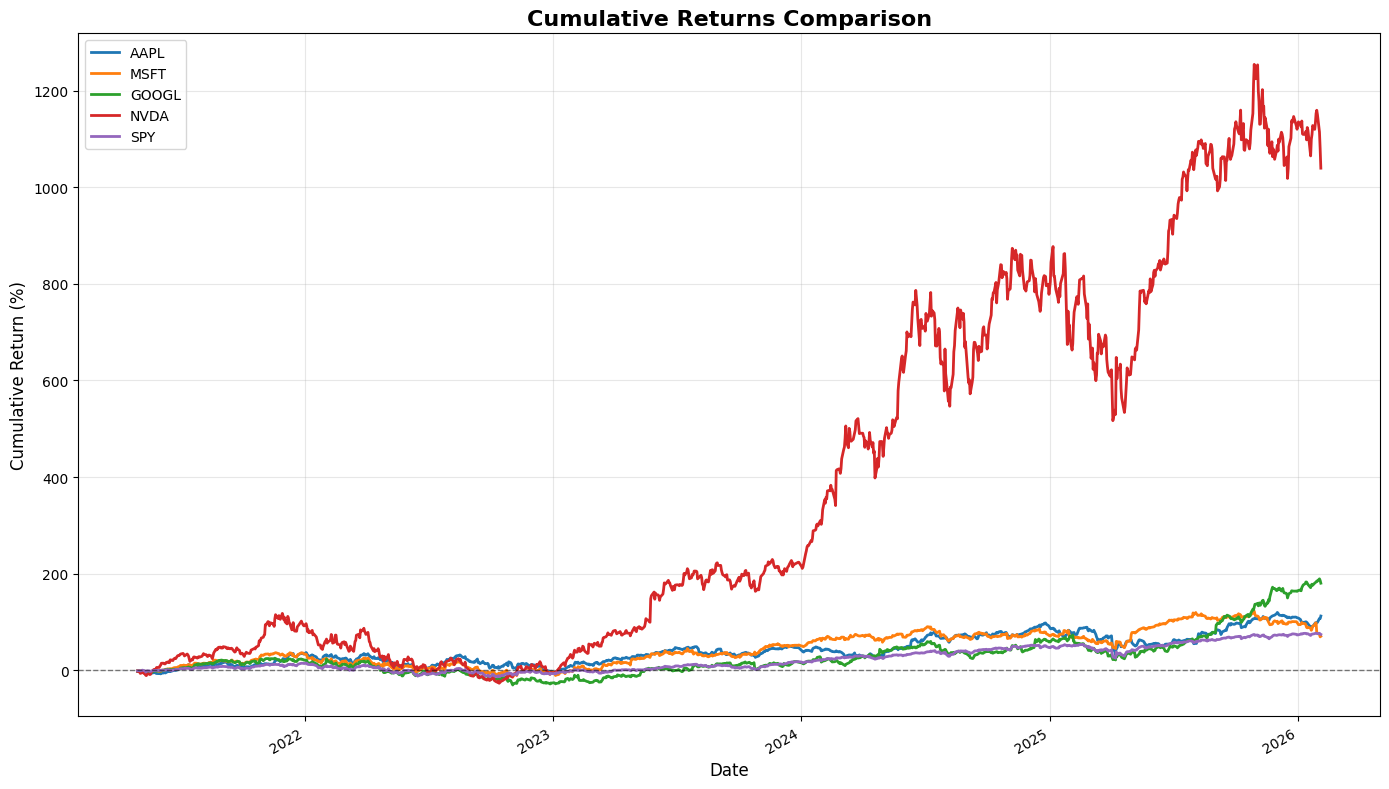


FINAL CUMULATIVE RETURNS
NVDA  :  1039.46%
GOOGL :   180.48%
AAPL  :   112.47%
SPY   :    74.43%
MSFT  :    70.55%


In [14]:
# Plot cumulative returns over time
plt.figure(figsize=(14, 8))

for ticker in selected_stocks:
    plt.plot(cumulative_returns_pct.index, 
             cumulative_returns_pct[ticker], 
             label=ticker, 
             linewidth=2)

plt.title('Cumulative Returns Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

# Format x-axis to show dates nicely
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Print final cumulative returns
print("\n" + "=" * 60)
print("FINAL CUMULATIVE RETURNS")
print("=" * 60)
final_returns = cumulative_returns_pct.iloc[-1].sort_values(ascending=False)
for ticker, ret in final_returns.items():
    print(f"{ticker:6s}: {ret:8.2f}%")